In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,classification_report
from sklearn.neural_network import MLPClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.externals import joblib

df = pd.read_csv('credit_train.csv')
df.head()

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(font_scale = 2)

from sklearn.model_selection import train_test_split

# Data Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
Loan ID                         100000 non-null object
Customer ID                     100000 non-null object
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null int64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null int64
Number of Credit Problems       100000 non-null int64
Current Credit Balance          100000 non-null int64
Maximum Open 

In [4]:
df.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [5]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [6]:
df.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

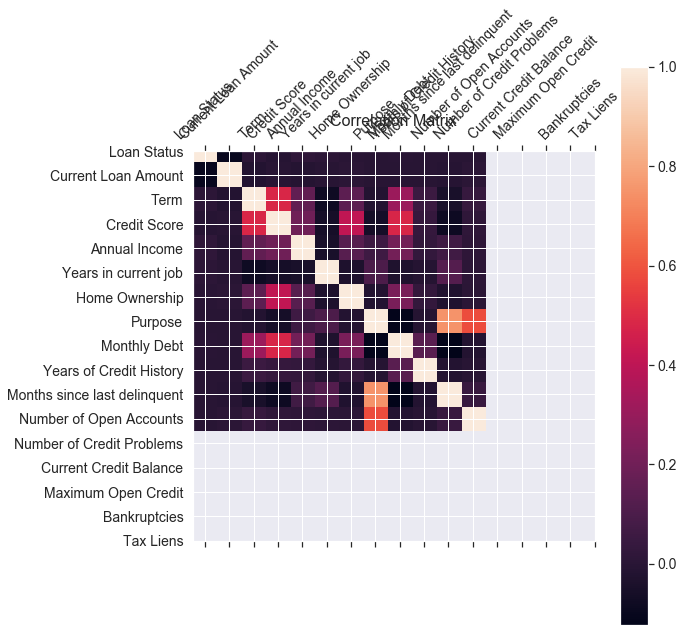

In [10]:
#Correlation matrix
f = plt.figure(figsize=(9, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

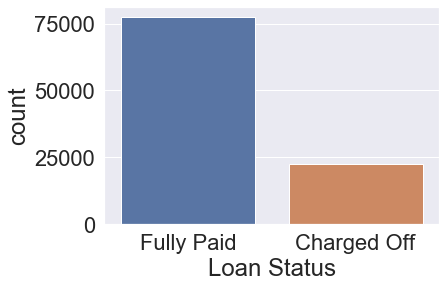

In [8]:
sns.countplot(df['Loan Status'] )

# Feature Selection

Feature Selection: Features with a high percentage of missing values Collinear (highly correlated) features Features with zero importance in a tree-based model Features with low importance Features with a single unique value

1: drop uninmportant columns

In [9]:
df.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

KeyError: "['Loan ID' 'Customer ID'] not found in axis"

In [ ]:
df.shape

2: Dealing with missing values

In [ ]:
df.isnull().sum()

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
missing_values_table(df)

In [ ]:
df.drop(columns = 'Months since last delinquent', axis=1, inplace=True) #drop months since last deliquent
df.drop(df.tail(514).index, inplace=True) # drop last 514 rows

In [ ]:
for i in df['Maximum Open Credit'][df['Maximum Open Credit'].isnull() == True].index:
    df.drop(labels=i, inplace=True)

In [ ]:
df.drop(columns = 'Number of Open Accounts', axis=1, inplace=True)
df.drop(columns = 'Current Credit Balance', axis=1, inplace=True)

In [ ]:
for i in df['Bankruptcies'][df['Bankruptcies'].isnull() == True].index:
    df.drop(labels=i, inplace=True)

In [ ]:
plt.figure(figsize=(20,8))

sns.countplot(df['Years in current job'])

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df.fillna('10+ years', inplace=True) # fill with '10+ years'.

months dropped: months since last deliquent, Number of Open Accounts, Current Credit Balance

In [ ]:
missing_values_table(df)

In [ ]:
df.head()

In [ ]:
df.columns

3: dealing with categorical data

In [ ]:
# Select the categorical columns
categorical_subset = df[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

df.drop(labels=['Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis=1, inplace=True)
df = pd.concat([df, categorical_subset], axis = 1)

In [ ]:
df

Dealing with collinear features

In [ ]:
# #  Remove Collinear Features

def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    y = x['Loan Status']
    x = x.drop(columns = ['Loan Status'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back in to the data
    x['Loan Status'] = y
               
    return x
df = remove_collinear_features(df, 0.6);

In [ ]:
df

In [ ]:
df.shape

In [ ]:
plt.figure(figsize=(20,8))

sns.countplot(df['Loan Status'])

# Machine Learning

In [ ]:
# # # Split Into Training and Testing Sets

# Separate out the features and targets
features = df.drop(columns='Loan Status')#features is dataset with no loan status
targets = pd.DataFrame(df['Loan Status'])#dataset with only loan status

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

In [ ]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# X_resampled, y_resampled = SMOTE().fit_resample(features, targets)
# X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 42)
# print(sorted(Counter(y_resampled).items()))

In [ ]:
# plt.figure(figsize=(20,8))

# sns.countplot(y_resampled)

In [ ]:
X_train

In [ ]:
y_train

standardize data 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


labelencoder_y_train = LabelEncoder()
y_train = labelencoder_y_train.fit_transform(y_train)
labelencoder_y_test = LabelEncoder()
y_test = labelencoder_y_test.fit_transform(y_test)

# X_train_sample = sc.fit_transform(X_train_sample)
# X_test_sample = sc.transform(X_test_sample)

# y_train_sample = labelencoder_y_train.fit_transform(y_train_sample)
# y_test_sample = labelencoder_y_test.fit_transform(y_test_sample)

logistic regression model

calculate recall, precision, f1-score and support
recall = tp/tp+fn
precision = tp/tp+fp
f1-score = 2*(recall*precision)/(recall+presision)
support = no of samples of true response that lie in that class

In [ ]:
from sklearn.linear_model import LogisticRegression
# Train model
clf_0 = LogisticRegression().fit(X_train, y_train)
 
# Predict on training set
pred_y_0 = clf_0.predict(X_test)
print("Accuracy score : ",accuracy_score(y_test, pred_y_0))
print ("Recall score   : ", recall_score(pred_y_0,y_test))
confusion_matrix(y_test, pred_y_0)
print ("classification report :\n",classification_report(pred_y_0,y_test))

In [ ]:
confusion_matrix(y_test, pred_y_0)

In [ ]:
plt.scatter(pred_y)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# # Train model
# clf_0_s = LogisticRegression().fit(X_train_sample, y_train_sample)
 
# # Predict on training set
# pred_y_0_s = clf_0_s.predict(X_test_sample)
# print("Accuracy score : ",accuracy_score(y_test_sample, pred_y_0_s))
# print ("Recall score   : ", recall_score(pred_y_0_s,y_test_sample))
# confusion_matrix(y_test_sample, pred_y_0_s)
# print ("classification report :\n",classification_report(pred_y_0_s,y_test_sample))

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)
sgd_pred= clf.predict(X_test)
print("Accuracy score : ",accuracy_score(y_test, sgd_pred))
print ("Recall score   : ", recall_score(sgd_pred,y_test))
confusion_matrix(y_test, sgd_pred)
print ("classification report :\n",classification_report(sgd_pred,y_test))

In [ ]:
plt.scatter()

In [ ]:
confusion_matrix(y_test, sgd_pred)

In [ ]:
# clf_s = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
# clf_s.fit(X_train_sample, y_train_sample)
# sgd_pred_s= clf_s.predict(X_test_sample)
# print("Accuracy score : ",accuracy_score(y_test_sample, sgd_pred_s))
# print ("Recall score   : ", recall_score(sgd_pred_s,y_test_sample))
# confusion_matrix(y_test_sample, sgd_pred_s)
# print ("classification report :\n",classification_report(sgd_pred_s,y_test_sample))

In [ ]:
gb = XGBClassifier(loss = 'ls',max_depth = 5,min_samples_leaf = 6,min_samples_split = 2,max_features = 'auto',
                   random_state = 42, n_estimators=100)
gb.fit(X_train, y_train)
gb_pred= gb.predict(X_test)
print("Accuracy score : ",accuracy_score(y_test, gb_pred))
print ("Recall score   : ", recall_score(gb_pred,y_test))
confusion_matrix(y_test, gb_pred)
print ("classification report :\n",classification_report(gb_pred,y_test))

In [ ]:
confusion_matrix(y_test, gb_pred)

In [ ]:
# gb_s = XGBClassifier(loss = 'ls',max_depth = 5,min_samples_leaf = 6,min_samples_split = 2,max_features = 'auto',
#                    random_state = 42, n_estimators=100)
# gb_s.fit(X_train_sample, y_train_sample)
# gb_pred_s= gb_s.predict(X_test_sample)
# print("Accuracy score : ",accuracy_score(y_test_sample, gb_pred_s))
# print ("Recall score   : ", recall_score(gb_pred_s,y_test_sample))
# confusion_matrix(y_test_sample, gb_pred_s)
# print ("classification report :\n",classification_report(gb_pred_s,y_test_sample))

In [ ]:
# confusion_matrix(y_test_sample, gb_pred_s)

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=40, random_state=21,oob_score=True)
clf_rf.fit(X_train, y_train)
clf_rf_pred= clf_rf.predict(X_test)
print("Accuracy score : ",accuracy_score(y_test, clf_rf_pred))
# print(clf_rf.oob_score_)
print ("Recall score   : ", recall_score(clf_rf_pred,y_test))
confusion_matrix(y_test, clf_rf_pred)
print ("classification report :\n",classification_report(clf_rf_pred,y_test))

In [ ]:
confusion_matrix(y_test,clf_rf_pred )

In [ ]:
# clf_rf_s = RandomForestClassifier(n_estimators=40, random_state=21)
# clf_rf_s.fit(X_train_sample, y_train_sample)
# clf_rf_pred_s= clf_rf_s.predict(X_test_sample)
# print("Accuracy score : ",accuracy_score(y_test_sample, clf_rf_pred_s))
# print ("Recall score   : ", recall_score(clf_rf_pred_s,y_test_sample))
# confusion_matrix(y_test_sample, clf_rf_pred_s)
# print ("classification report :\n",classification_report(clf_rf_pred_s,y_test_sample))

In [ ]:
feature_results1 = pd.DataFrame({'feature': list(features.columns), 
                                'importance': gb.feature_importances_})

# Show the top 10 most important
feature_results = feature_results1.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

In [ ]:
feature_results = feature_results.set_index('feature')


In [ ]:
# feature_results.plot(kind = 'barh')
ax = feature_results.plot(kind='barh', x = feature_results['feature'], y =feature_results['importance'] ,figsize=(6, 9), color='#86bf91')

In [ ]:
joblib.dump(gb, 'model.pkl')

In [ ]:

joblib.dump(sc, 'scaler.pkl')

In [ ]:
model_columns = list(features.columns)
joblib.dump(model_columns, 'model_columns.pkl')

In [ ]:
json_data = {
        "Current Loan Amount" : 2000000,
        "Term" : "Short Term",
        "Credit Score" : 60,
        "Annual Income" : 100000,
        "Monthly Debt" : 200000,
        "Years of Credit History" : 20,
        "Number of Credit Problems": 7,
        "Years in current job": "1 year",
        "Home Ownership": "Home Mortgage",
        "Purpose": "Small Business",
        "Tax Liens": 4,
        "Maximum Open Credit": 300000
}


In [ ]:
query = pd.DataFrame(json_data , index=[0])
query

In [ ]:
categorical_subset = query[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]

categorical_subset = pd.get_dummies(categorical_subset)

query.drop(labels=['Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis=1, inplace=True)
query = pd.concat([query, categorical_subset], axis = 1)
query

In [ ]:
model_cols = joblib.load("model_columns.pkl")
scaler = joblib.load('scaler.pkl')
query = query.reindex(columns=model_columns, fill_value=0)
query = scaler.transform(query)
query

In [ ]:
obj = joblib.load("model.pkl")
prediction = list(obj.predict(query))
prediction

In [ ]:
if prediction[0] == 1:
    risk = "Low Risk"
else:
    risk = "High Risk"
risk